## 1. Data Exploration and Cleaning

#### Data and Library Importation

In [173]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree



# data can be found here: https://github.com/brandi-giuseppe/DataCourse/blob/main/Data/Enviromental/temperature.csv
filepath = 'data/auto-mpg.csv'
df = pd.read_csv(filepath)

# drop unnecessary columns
df.drop(columns=['model year', 'origin'], inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,car name
0,18.0,8,307.0,130,3504,12.0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,ford torino


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   car name      398 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 21.9+ KB


In [175]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
car name        0
dtype: int64

In [176]:
print(df['horsepower'].unique())
# convert instances of '?' to NaN
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df.dropna(inplace=True)
df.info()


['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']
<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   car name      392 non-null

In [177]:
df.duplicated().sum()

np.int64(1)

In [178]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


In [179]:
# convert 

## Correlation Matrix


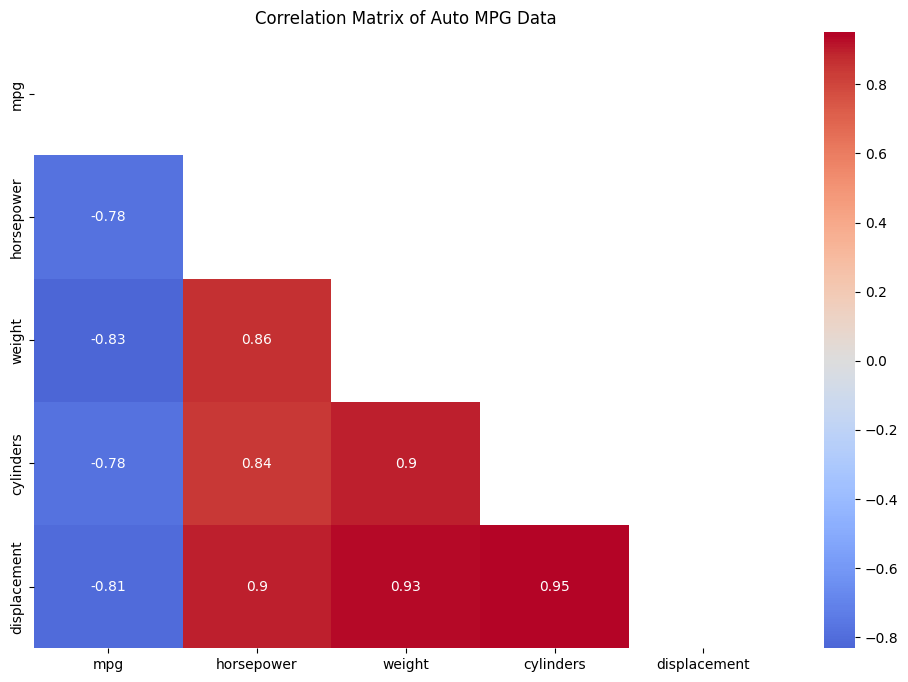

In [180]:
df_key_variables = df[['mpg', 'horsepower', 'weight', 'cylinders', 'displacement']]

correlation_matrix = df_key_variables.corr(numeric_only=True)

# create a mask to only show the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, mask=mask)
plt.title('Correlation Matrix of Auto MPG Data')
plt.show()


## Scatter Plot Between Variables

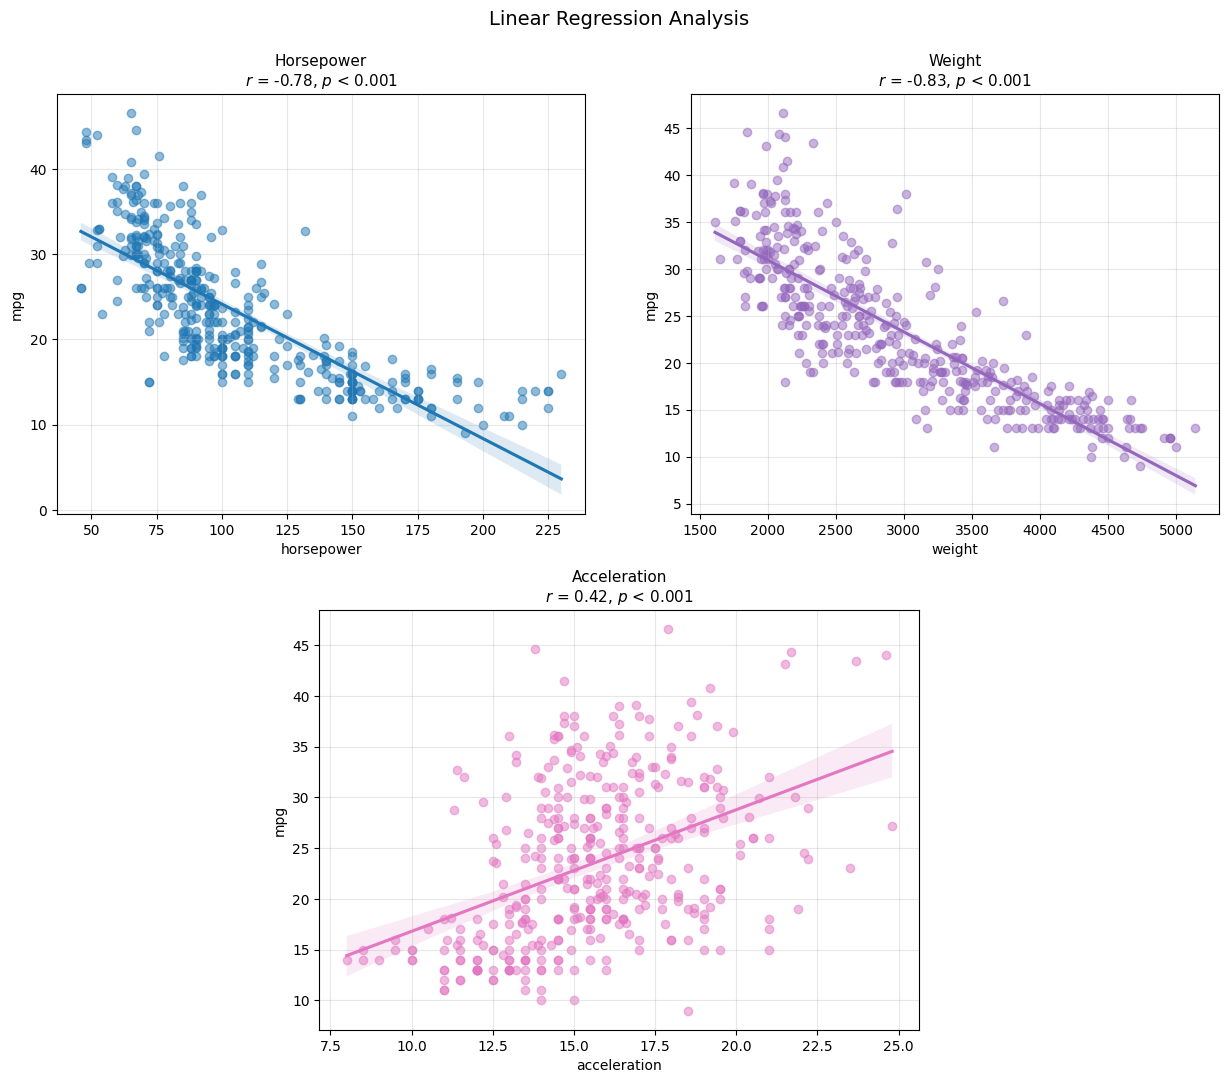

In [181]:
#create a scatter plot between horsepower and the other variables
dependent_variable = 'mpg'
independent_variables = ['horsepower', 'weight', 'acceleration']

colours = ["#1f77b4", "#9467bd", "#e377c2"]

# Format p-value string
def format_p(p):
    if p < 0.001:
        return "< 0.001"
    else:
        return f"= {p:.3f}"

fig = plt.figure(figsize=(15, 12))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

# Create subplots, first two in the top row, third in the bottom row
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

axes = [ax1, ax2, ax3]

colours = ["#1f77b4", "#9467bd", "#e377c2"]

# scatter plots with correlation and p-values
for i, iv in enumerate(independent_variables):
    # collect Pearson correlation and p-value
    r_val, p_val = stats.pearsonr(df[dependent_variable], df[iv])
    
    p_formatted = format_p(p_val)
    
    # create regression plot
    sns.regplot(x=df[iv], 
                y=df[dependent_variable], 
                color=colours[i], 
                ax=axes[i],
                scatter_kws={"color": colours[i], "alpha": 0.5},
                line_kws={"color": colours[i]})
    
    # Set titles and labels
    axes[i].set_title(f"{iv.title()}\n$r$ = {r_val:.2f}, $p$ {p_formatted}", fontsize=11)
    axes[i].set_xlabel(iv)
    axes[i].set_ylabel(dependent_variable)
    axes[i].grid(True, alpha=0.3)

# Adjust the position of the bottom plot to be centered but same size as others
axes[2].set_position([0.3, 0.1, 0.4, 0.35])  # [left, bottom, width, height]

plt.suptitle("Linear Regression Analysis", y=0.95, fontsize=14)
plt.show()

## Polynomial Regression

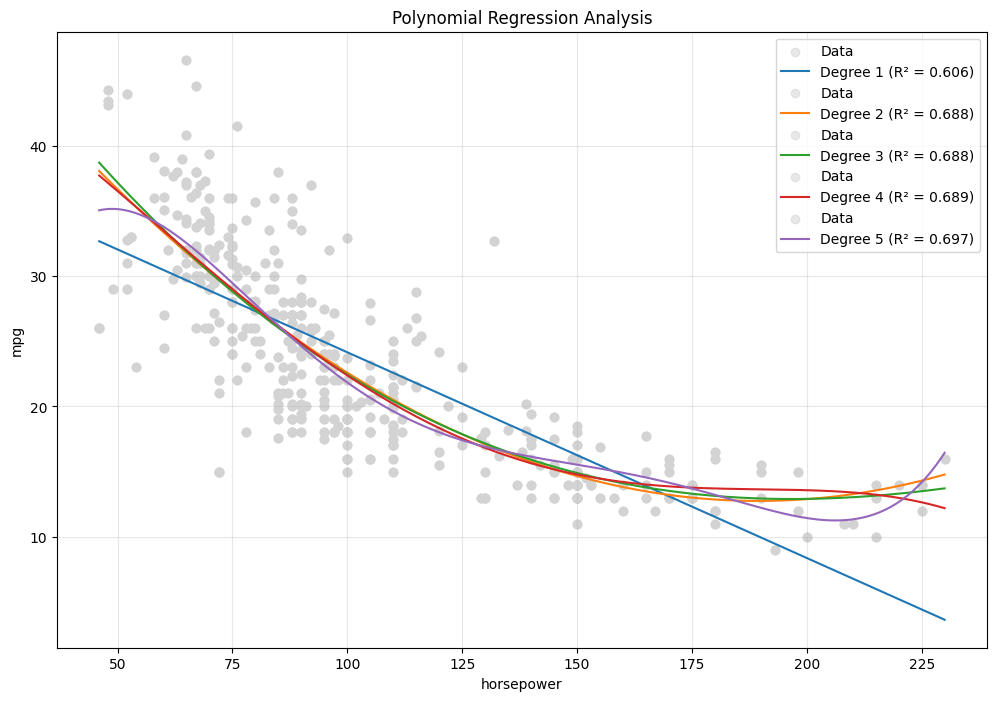


Best polynomial degree: 2 (R² = 0.688)

Best model equation:
y = 56.90 - 0.4662x^1 + 0.0012x^2


In [197]:
independent_variable = 'horsepower'
dependent_variable = 'mpg'

# perform polynomial regression, test degrees 2, 3, 4, 5 to find the best fit
# plot the results
# calculate the R-squared value for each model
# select the best model based on the R-squared value
# plot the best model
# print the equation of the best model
# Create polynomial features for degrees 2-5
degrees = [1, 2, 3, 4, 5]
X = df[independent_variable].values.reshape(-1, 1)
y = df[dependent_variable].values

plt.figure(figsize=(12, 8))
r2_scores = []

# Test each polynomial degree
for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Calculate R-squared
    r2 = r2_score(y, model.predict(X_poly))
    r2_scores.append(r2)
    
    # Create points for smooth curve
    X_smooth = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    X_smooth_poly = poly_features.transform(X_smooth)
    y_smooth = model.predict(X_smooth_poly)
    
    # Plot
    plt.scatter(X, y, alpha=0.5, label=f'Data', color="lightgray")
    plt.plot(X_smooth, y_smooth, 
             label=f'Degree {degree} (R² = {r2:.3f})')

plt.xlabel(independent_variable)
plt.ylabel(dependent_variable)
plt.title('Polynomial Regression Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Find best model
# best_degree = degrees[np.argmax(r2_scores)] (commented due to manual selection)
best_degree = 2
best_r2 = "0.688" # hard coded due to manual selection
print(f"\nBest polynomial degree: {best_degree} (R² = {best_r2})")

# Fit best model
best_poly_features = PolynomialFeatures(degree=best_degree)
X_best_poly = best_poly_features.fit_transform(X)
best_model = LinearRegression()
best_model.fit(X_best_poly, y)

# Print equation
coefficients = best_model.coef_
intercept = best_model.intercept_
equation = f"y = {intercept:.2f}"
for i, coef in enumerate(coefficients[1:], 1):
    if coef >= 0:
        equation += f" + {coef:.4f}x^{i}"
    else:
        equation += f" - {abs(coef):.4f}x^{i}"
        
print("\nBest model equation:")
print(equation)



## Multivariable Regression

In [183]:
# Perform multivariable regression
X = df[['horsepower', 'weight', 'acceleration']]
y = df['mpg']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Get R² score
r2 = model.score(X, y)

# Print results
print("Multivariable Regression Results:")
print(f"R² Score: {r2:.3f}")
print("\nCoefficients:")
for feature, coef in zip(['horsepower', 'weight', 'acceleration'], model.coef_):
    print(f"{feature.title()}: {coef:.3f}")
print(f"\nIntercept: {model.intercept_:.3f}")

# Create equation string
equation = f"MPG = {model.intercept_:.3f}"
for feature, coef in zip(['Horsepower', 'Weight', 'Acceleration'], model.coef_):
    if coef >= 0:
        equation += f" + {coef:.3f}×{feature}"
    else:
        equation += f" - {abs(coef):.3f}×{feature}"
print("\nEquation:")
print(equation)


Multivariable Regression Results:
R² Score: 0.706

Coefficients:
Horsepower: -0.047
Weight: -0.006
Acceleration: -0.002

Intercept: 45.678

Equation:
MPG = 45.678 - 0.047×Horsepower - 0.006×Weight - 0.002×Acceleration


In [184]:
# Get the p-values for the coefficients
from scipy import stats

# Calculate p-values using scipy.stats
n = len(y)  # Number of observations
p = len(X.columns)  # Number of predictors

# Get MSE and predicted values
y_pred = model.predict(X)
mse = np.sum((y - y_pred) ** 2) / (n - p - 1)

# Calculate variance-covariance matrix
X_with_intercept = np.column_stack([np.ones(n), X])
var_covar_matrix = mse * np.linalg.inv(X_with_intercept.T @ X_with_intercept)

# Get standard errors
se = np.sqrt(np.diag(var_covar_matrix))

# Calculate t-statistics
t_stats = np.r_[model.intercept_, model.coef_] / se

# Calculate p-values
p_values = 2 * (1 - stats.t.cdf(abs(t_stats), n - p - 1))

# Print results
print("\nP-values:")
print(f"Intercept: {p_values[0]:.4f}")
for feature, p_val in zip(['horsepower', 'weight', 'acceleration'], p_values[1:]):
    print(f"{feature}: {p_val:.4f}")




P-values:
Intercept: 0.0000
horsepower: 0.0032
weight: 0.0000
acceleration: 0.9866


## Classification: Logistic Regression

In [185]:

# key metrics:  model accuracy, precision, recall, confusion matrix
def report_classification_metrics(y_true, y_pred, model_name="Model"):
    """
    Plot and print classification metrics including accuracy, classification report,
    and confusion matrix heatmap
    
    Parameters:
    -----------
    y_true : array-like
        True labels
    y_pred : array-like 
        Predicted labels
    model_name : str
        Name of the model for display purposes
    """
    # Calculate accuracy
    acc = accuracy_score(y_true, y_pred)
    
    # Print model name and accuracy
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {acc:.3f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Low MPG', 'High MPG'],
                yticklabels=['Low MPG', 'High MPG'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()





Logistic Regression Results:
Accuracy: 0.886

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        42
           1       0.80      1.00      0.89        37

    accuracy                           0.89        79
   macro avg       0.90      0.89      0.89        79
weighted avg       0.91      0.89      0.89        79



/home/marce/code/theory_application_of_da/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


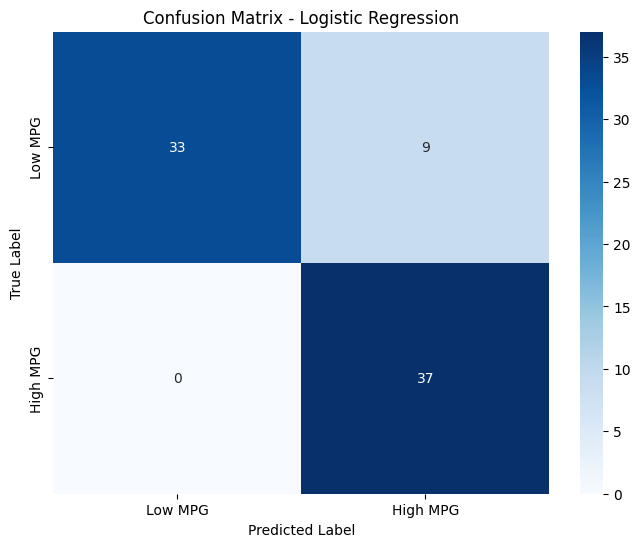

In [186]:
# Create binary labels based on median MPG
median_mpg = df['mpg'].median()
df['efficiency'] = (df['mpg'] > median_mpg).astype(int)

# Prepare features and target
X = df[['horsepower', 'weight', 'acceleration', 'cylinders', 'displacement']]
y = df['efficiency']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)

# Test the function with the logistic regression results
report_classification_metrics(y_test, y_pred, "Logistic Regression")





## Classification: Decision Tree

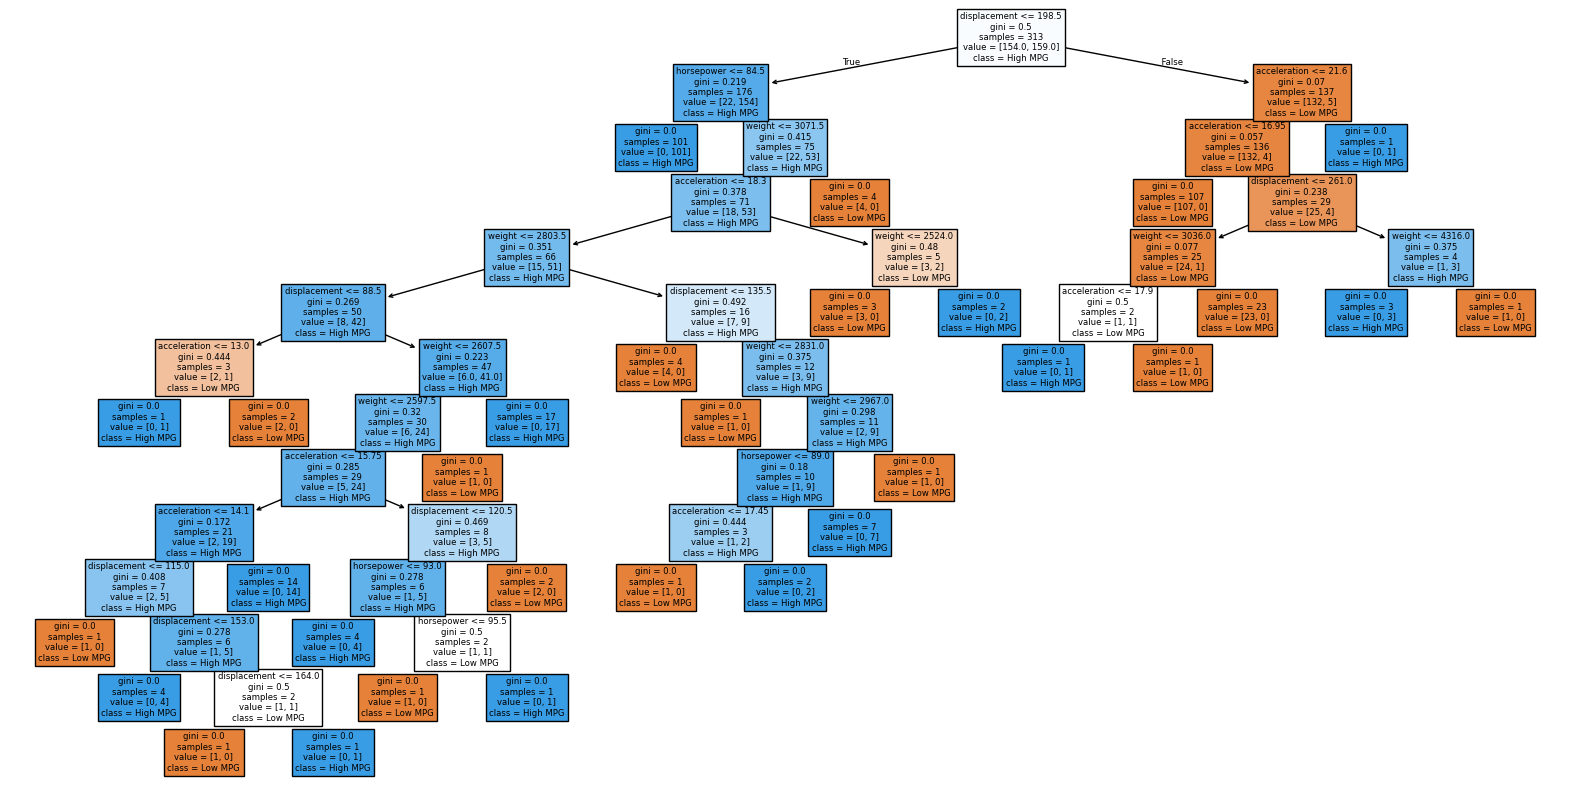

In [187]:
# Conduct a decision tree classification on the data
# Plot the results
# Print the accuracy of the model
# Print the confusion matrix
# Print the classification report

# Train decision tree classifier

# Initialize and train the decision tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Make predictions
dt_pred = dt_clf.predict(X_test)

# Calculate and print accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)

# visualise the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, filled=True, feature_names=X.columns, class_names=['Low MPG', 'High MPG'])
plt.show()



Logistic Regression Results:
Accuracy: 0.886

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        42
           1       0.80      1.00      0.89        37

    accuracy                           0.89        79
   macro avg       0.90      0.89      0.89        79
weighted avg       0.91      0.89      0.89        79



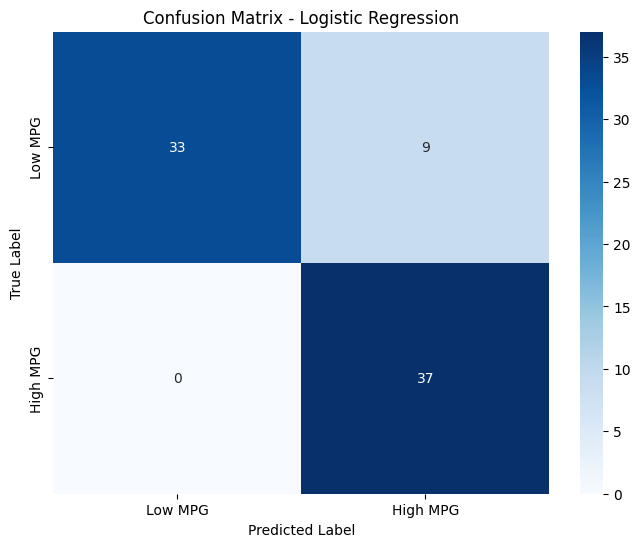

In [188]:
# Test the function with the logistic regression results
report_classification_metrics(y_test, y_pred, "Logistic Regression")


Decision Tree Results:
Accuracy: 0.861

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        42
           1       0.81      0.92      0.86        37

    accuracy                           0.86        79
   macro avg       0.86      0.86      0.86        79
weighted avg       0.87      0.86      0.86        79



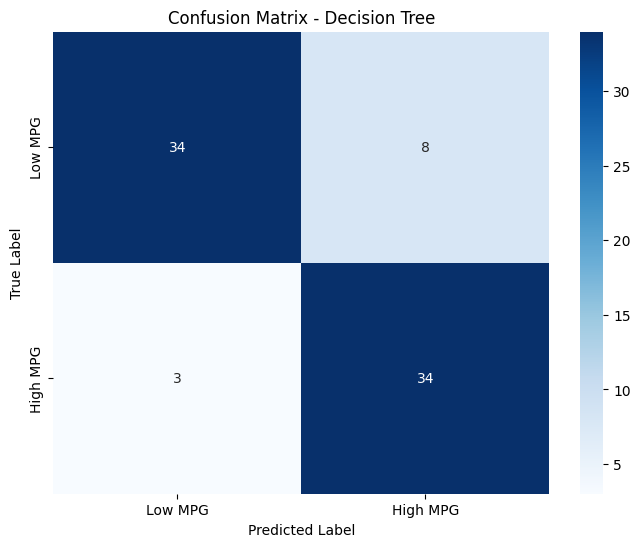

In [189]:
# Test the function with the decision tree results
report_classification_metrics(y_test, dt_pred, "Decision Tree")